In [1]:
import pandas as pd 
import sklearn 
from sklearn.ensemble import BaggingClassifier     
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
#---------------------------------------------------------------------------------
simplify = pd.read_csv('penguins_size.csv') #7 344
full = pd.read_csv('penguins_lter.csv') # 17 344
#---------------------------------------------------------------------------------
test_simplify = simplify.iloc[2::3].copy() # 2 5 8............
print(test_simplify.index.tolist())
train_index = list(range(0,len(simplify),3)) + list(range(1,len(simplify),3))
train_index = sorted(train_index)
train_simplify = simplify.iloc[train_index].copy() # 0 1 3 4...............
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)

#train:test = 2: 1---------------------------------------------------------------------------------
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#-------------------------------------------------------------------------------------------------
# 建立 GaussianNB 模型 
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
para1 = [0]
while i < len(para1): 
    classifier = GaussianNB()
    model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y) 
    # 預測
    test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
    predict = test_simplify_y_predicted.tolist()
    ##print(predict)
    # -------------------------------------------------------
    test_simplify['predict'] = predict
    answer = {"species": test_simplify[factor[0]], "predict": predict}
    answer_df = pd.DataFrame(answer)
    ##print(answer_df) 
    #Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
    #for l in range(47):
    #    if predict[l]=='Adelie':
    #        Ade[0]+=1
    #    if predict[l]=='Chinstrap':
    #        Chi[0]+=1
    #    if predict[l]=='Gentoo':
    #        Gen[0]+=1
    #for l in range(23):
    #    if predict[47+l]=='Adelie':
    #        Ade[1]+=1
    #    if predict[47+l]=='Chinstrap':
    #        Chi[1]+=1
    #    if predict[47+l]=='Gentoo':
    #        Gen[1]+=1   
    #for l in range(41):
    #    if predict[70+l]=='Adelie':
    #        Ade[2]+=1
    #    if predict[70+l]=='Chinstrap':
    #        Chi[2]+=1
    #    if predict[70+l]=='Gentoo':
    #        Gen[2]+=1  
    #fig, ax = plt.subplots(figsize=(6,3))  
    #X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
    #X1.index = ["Adelie","Chinstrap","Gentoo"] 
    #sns.heatmap(X1 , cmap="coolwarm",annot=True ,ax=ax,linecolor="purple")  
    #plt.xlabel("Predicted label")
    #plt.ylabel("True label")  
    #plt.show() 
    #print(result0)
    print(classification_report(test_simplify[factor[0]],predict)) 
    count = count + 1 
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152, 155, 158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194, 197, 200, 203, 206, 209, 212, 215, 218, 221, 224, 227, 230, 233, 236, 239, 242, 245, 248, 251, 254, 257, 260, 263, 266, 269, 272, 275, 278, 281, 284, 287, 290, 293, 296, 299, 302, 305, 308, 311, 314, 317, 320, 323, 326, 329, 332, 335, 338, 341]
              precision    recall  f1-score   support

      Adelie       1.00      0.36      0.53        47
   Chinstrap       0.59      1.00      0.74        23
      Gentoo       0.75      1.00      0.85        41

    accuracy                           0.73       111
   macro avg       0.78      0.79      0.71       111
weighted avg       0.82      0.73      0.69       111



<ipython-input-2-db4218bb51db>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-2-db4218bb51db>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [3]:
#train:test = 3: 1---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
test_simplify = simplify.iloc[3::4].copy() # 3 7 11............
#print(test_simplify.index.tolist())
train_index = list(range(0,len(simplify),4)) + list(range(1,len(simplify),4)) + list(range(2,len(simplify),4))
train_index = sorted(train_index)
train_simplify = simplify.iloc[train_index].copy() # 0 1 2 4 5 6 8 9 10...............
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist() 
#-------------------------------------------------------------------------------------------------
# 建立 GaussianNB 模型
para1 = [0]
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1): 
    classifier = GaussianNB()
    model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
    # 預測
    test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
    predict = test_simplify_y_predicted.tolist()
    # -------------------------------------------------------
    test_simplify['predict'] = predict
    answer = {"species": test_simplify[factor[0]], "predict": predict}
    answer_df = pd.DataFrame(answer)
    ##print(answer_df) 
    #Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
    #for l in range(35):
    #    if predict[l]=='Adelie':
    #        Ade[0]+=1
    #    if predict[l]=='Chinstrap':
    #        Chi[0]+=1
    #    if predict[l]=='Gentoo':
    #        Gen[0]+=1
    #for l in range(17):
    #    if predict[35+l]=='Adelie':
    #        Ade[1]+=1
    #    if predict[35+l]=='Chinstrap':
    #        Chi[1]+=1
    #    if predict[35+l]=='Gentoo':
    #        Gen[1]+=1   
    #for l in range(30):
    #    if predict[52+l]=='Adelie':
    #        Ade[2]+=1
    #    if predict[52+l]=='Chinstrap':
    #        Chi[2]+=1
    #    if predict[52+l]=='Gentoo':
    #        Gen[2]+=1  
    #fig, ax = plt.subplots(figsize=(6,3))  
    #X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
    #X1.index = ["Adelie","Chinstrap","Gentoo"] 
    #sns.heatmap(X1 , cmap="coolwarm",annot=True ,ax=ax,linecolor="purple")  
    #plt.xlabel("Predicted label")
    #plt.ylabel("True label")  
    #plt.show() 
    #print(result0)
    print(classification_report(test_simplify[factor[0]],predict)) 
    count = count + 1 
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

      Adelie       1.00      0.37      0.54        35
   Chinstrap       0.57      1.00      0.72        17
      Gentoo       0.77      1.00      0.87        30

    accuracy                           0.73        82
   macro avg       0.78      0.79      0.71        82
weighted avg       0.83      0.73      0.70        82



<ipython-input-3-4cecdfe245a7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-3-4cecdfe245a7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

<ipython-input-4-c032fa41a835>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-4-c032fa41a835>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

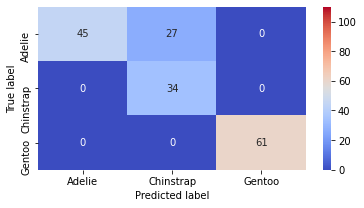

              precision    recall  f1-score   support

      Adelie       1.00      0.62      0.77        72
   Chinstrap       0.56      1.00      0.72        34
      Gentoo       1.00      1.00      1.00        61

    accuracy                           0.84       167
   macro avg       0.85      0.88      0.83       167
weighted avg       0.91      0.84      0.84       167



In [4]:
#train:test = 1: 1---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
test_simplify = simplify.iloc[1::2].copy() # 1 3 5 7 ............
#print(test_simplify.index.tolist())
train_index = list(range(0,len(simplify),2)) 
train_index = sorted(train_index)
train_simplify = simplify.iloc[train_index].copy() # 0 2 4 6 8...............
#print(train_simplify.index.tolist())
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist() 
#-------------------------------------------------------------------------------------------------
# 建立 GaussianNB 模型
para1 = [0]
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1): 
    classifier = GaussianNB()
    model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
    # 預測
    test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
    predict = test_simplify_y_predicted.tolist()
    # -------------------------------------------------------
    test_simplify['predict'] = predict
    answer = {"species": test_simplify[factor[0]], "predict": predict}
    answer_df = pd.DataFrame(answer)
    ##print(answer_df)  
    Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
    for l in range(72):
        if predict[l]=='Adelie':
            Ade[0]+=1
        if predict[l]=='Chinstrap':
            Chi[0]+=1
        if predict[l]=='Gentoo':
            Gen[0]+=1
    for l in range(34):
        if predict[72+l]=='Adelie':
            Ade[1]+=1
        if predict[72+l]=='Chinstrap':
            Chi[1]+=1
        if predict[72+l]=='Gentoo':
            Gen[1]+=1   
    for l in range(61):
        if predict[106+l]=='Adelie':
            Ade[2]+=1
        if predict[106+l]=='Chinstrap':
            Chi[2]+=1
        if predict[106+l]=='Gentoo':
            Gen[2]+=1  
    fig, ax = plt.subplots(figsize=(6,3))  
    X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
    X1.index = ["Adelie","Chinstrap","Gentoo"] 
    sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.show() 
    print(classification_report(test_simplify[factor[0]],predict)) 
    count = count + 1 
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

<ipython-input-5-8ca5e522965a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-5-8ca5e522965a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

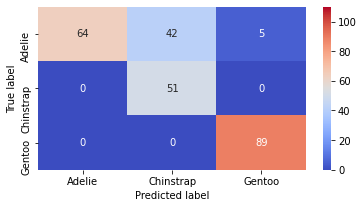

              precision    recall  f1-score   support

      Adelie       1.00      0.58      0.73       111
   Chinstrap       0.55      1.00      0.71        51
      Gentoo       0.95      1.00      0.97        89

    accuracy                           0.81       251
   macro avg       0.83      0.86      0.80       251
weighted avg       0.89      0.81      0.81       251



In [5]:
#train:test = 1: 3---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
train_simplify = simplify.iloc[3::4].copy() # 3 7 11............
#print(train_simplify.index.tolist())
test_index = list(range(0,len(simplify),4)) + list(range(1,len(simplify),4)) + list(range(2,len(simplify),4))
test_index = sorted(test_index)
test_simplify = simplify.iloc[test_index].copy() # 0 1 2 4 5 6 8 9 10...............
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist() 
#-------------------------------------------------------------------------------------------------
# 建立 GaussianNB 模型
para1 = [0]
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1): 
    classifier = GaussianNB()
    model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
    # 預測
    test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
    predict = test_simplify_y_predicted.tolist()
    # -------------------------------------------------------
    test_simplify['predict'] = predict
    answer = {"species": test_simplify[factor[0]], "predict": predict}
    answer_df = pd.DataFrame(answer)
    ##print(answer_df) 
    Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
    for l in range(111):
        if predict[l]=='Adelie':
            Ade[0]+=1
        if predict[l]=='Chinstrap':
            Chi[0]+=1
        if predict[l]=='Gentoo':
            Gen[0]+=1
    for l in range(51):
        if predict[111+l]=='Adelie':
            Ade[1]+=1
        if predict[111+l]=='Chinstrap':
            Chi[1]+=1
        if predict[111+l]=='Gentoo':
            Gen[1]+=1   
    for l in range(89):
        if predict[162+l]=='Adelie':
            Ade[2]+=1
        if predict[162+l]=='Chinstrap':
            Chi[2]+=1
        if predict[162+l]=='Gentoo':
            Gen[2]+=1  
    fig, ax = plt.subplots(figsize=(6,3))  
    X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
    X1.index = ["Adelie","Chinstrap","Gentoo"] 
    sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.show() 
    print(classification_report(test_simplify[factor[0]],predict)) 
    count = count + 1 
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

<ipython-input-6-0161b16c010f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-6-0161b16c010f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

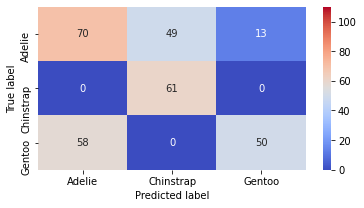

              precision    recall  f1-score   support

      Adelie       0.55      0.53      0.54       132
   Chinstrap       0.55      1.00      0.71        61
      Gentoo       0.79      0.46      0.58       108

    accuracy                           0.60       301
   macro avg       0.63      0.66      0.61       301
weighted avg       0.64      0.60      0.59       301



In [6]:
#train:test = 1: 9---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
train_simplify = simplify.iloc[9::10].copy() # 9 19 29............
##print(train_simplify.index.tolist())
test_index = list(range(0,len(simplify),10)) + list(range(1,len(simplify),10)) + list(range(2,len(simplify),10)) + list(range(3,len(simplify),10)) + list(range(4,len(simplify),10)) + list(range(5,len(simplify),10)) + list(range(6,len(simplify),10)) + list(range(7,len(simplify),10)) + list(range(8,len(simplify),10))
test_index = sorted(test_index)
test_simplify = simplify.iloc[test_index].copy() # 0 1 2 3 4 5 6 7 8 10...............
##print(test_simplify.index.tolist())
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist() 
#-------------------------------------------------------------------------------------------------
# 建立 GaussianNB 模型
para1 = [0]
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1): 
    classifier = GaussianNB()
    model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
    # 預測
    test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
    predict = test_simplify_y_predicted.tolist()
    # -------------------------------------------------------
    test_simplify['predict'] = predict
    answer = {"species": test_simplify[factor[0]], "predict": predict}
    answer_df = pd.DataFrame(answer)
    ##print(answer_df) 
    Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
    for l in range(132):
        if predict[l]=='Adelie':
            Ade[0]+=1
        if predict[l]=='Chinstrap':
            Chi[0]+=1
        if predict[l]=='Gentoo':
            Gen[0]+=1
    for l in range(61):
        if predict[132+l]=='Adelie':
            Ade[1]+=1
        if predict[132+l]=='Chinstrap':
            Chi[1]+=1
        if predict[132+l]=='Gentoo':
            Gen[1]+=1   
    for l in range(108):
        if predict[193+l]=='Adelie':
            Ade[2]+=1
        if predict[193+l]=='Chinstrap':
            Chi[2]+=1
        if predict[193+l]=='Gentoo':
            Gen[2]+=1  
    fig, ax = plt.subplots(figsize=(6,3))  
    X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
    X1.index = ["Adelie","Chinstrap","Gentoo"] 
    sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.show() 
    print(classification_report(test_simplify[factor[0]],predict)) 
    count = count + 1 
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------

<ipython-input-7-c89d21a16ef9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
c:\python37\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-7-c89d21a16ef9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

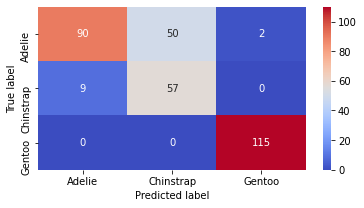

              precision    recall  f1-score   support

      Adelie       0.91      0.63      0.75       142
   Chinstrap       0.53      0.86      0.66        66
      Gentoo       0.98      1.00      0.99       115

    accuracy                           0.81       323
   macro avg       0.81      0.83      0.80       323
weighted avg       0.86      0.81      0.82       323



In [7]:
#train只取其中十筆，其餘為test---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
#---------------------------------------------------------------------------------
train_simplify = simplify.iloc[34::32].copy() # 34 66 98 130 162.......
#print(train_simplify)
test_index = list(range(0,len(simplify)))
del test_index[34::32]
test_simplify = simplify.iloc[test_index].copy() # 0 1 2...33 35............ 
#print(test_simplify.index.tolist()) 
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
factor = train_simplify.columns.tolist()
##print(factor)
train_simplify = train_simplify[train_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
train_simplify_x = train_simplify[factor[1:]]
train_simplify_y = train_simplify[factor[0]]
Std = StandardScaler()
train_simplify_x[factor[2:6]] = Std.fit_transform(train_simplify_x[factor[2:6]]) #標準化
train_simplify_x_dummies = pd.get_dummies(train_simplify_x)
##print(train_simplify_x_dummies)
#-------------------------------------------------------------------------------
test_simplify = test_simplify[test_simplify["sex"].isin(["MALE","FEMALE"])] #把sex不是 "MALE","FEMALE"的清掉，同時也清掉NA
test_simplify_x = test_simplify[factor[1:]]
test_simplify_y = test_simplify[factor[0]]
##print(test_simplify_y)
##print(test_simplify_x)
test_simplify_x[factor[2:6]] = Std.fit_transform(test_simplify_x[factor[2:6]]) #標準化
test_simplify_x_dummies = pd.get_dummies(test_simplify_x)
##print(test_simplify_x_dummies)
#----------------------------------------------------------------------------------
dummy = test_simplify_x_dummies.columns.tolist() 
#-------------------------------------------------------------------------------------------------
# 建立 GaussianNB 模型
para1 = [0]
#fit--------------------------------------------------------------------------------------------------------------------
count = 0
i = 0
while i < len(para1): 
    classifier = GaussianNB()
    model0 = classifier.fit(train_simplify_x_dummies, train_simplify_y)
    # 預測
    test_simplify_y_predicted = model0.predict(test_simplify_x_dummies)
    predict = test_simplify_y_predicted.tolist()
    # -------------------------------------------------------
    test_simplify['predict'] = predict
    answer = {"species": test_simplify[factor[0]], "predict": predict}
    answer_df = pd.DataFrame(answer)
    ##print(answer_df) 
    Ade = [0,0,0] ; Chi = [0,0,0] ;Gen = [0,0,0]
    for l in range(142):
        if predict[l]=='Adelie':
            Ade[0]+=1
        if predict[l]=='Chinstrap':
            Chi[0]+=1
        if predict[l]=='Gentoo':
            Gen[0]+=1
    for l in range(66):
        if predict[142+l]=='Adelie':
            Ade[1]+=1
        if predict[142+l]=='Chinstrap':
            Chi[1]+=1
        if predict[142+l]=='Gentoo':
            Gen[1]+=1   
    for l in range(115):
        if predict[208+l]=='Adelie':
            Ade[2]+=1
        if predict[208+l]=='Chinstrap':
            Chi[2]+=1
        if predict[208+l]=='Gentoo':
            Gen[2]+=1  
    fig, ax = plt.subplots(figsize=(6,3))  
    X1=pd.DataFrame({"Adelie":Ade,"Chinstrap":Chi,"Gentoo":Gen})
    X1.index = ["Adelie","Chinstrap","Gentoo"] 
    sns.heatmap(X1 , cmap="coolwarm" , fmt = 'd',annot=True ,ax=ax,linecolor="purple",vmax = 110)  
    plt.xlabel("Predicted label")
    plt.ylabel("True label")  
    plt.show() 
    print(classification_report(test_simplify[factor[0]],predict)) 
    count = count + 1 
    i = i + 1
    #---------------------------------------------------------------------------------------------------------------------